In [ ]:
import pandas as pd
import numpy as np
#Data Visualisation
import matplotlib.pyplot as plt
#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#Models
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#  Charger la base de données des concentrations des éléments
data_concentrations = pd.read_excel("CRM-CORR.xlsx")
data_concentrations.shape

(9, 42)

In [ ]:
data_concentrations.head()

,Stdname,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,Type,Statut,...,Cd,Co,Ga,Li,Na,Sr,V,Zr,Sb,P
0,HP FJ,01/15/2002,1080,300.0,0,NaN,N,295,D,NaN,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
1,A413.2 CAB,06/10/1994,33,17.0,1,NaN,N,200,D,NaN,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0014,0.0003
2,6061 DAO,10/17/2000,499,NaN,0,standard de contrôle de qualité,N,150,D,NaN,...,0.0000,0.0002,0.0172,0.0000,0.0001,0.0000,0.0120,0.0023,0.0000,0.0008
3,3005 CAB,05/06/1993,49,10.0,1,NaN,N,200,D,NaN,...,0.0001,0.0002,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0002
4,3105 AD,04/20/1994,200,26.0,1,NaN,N,200,D,NaN,...,0.0000,0.0000,0.0230,0.0011,0.0013,0.0024,0.0230,0.0026,0.0029,0.0020


In [ ]:
data_concentrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stdname      9 non-null      object 
 1   Certifié le  9 non-null      object 
 2   Inventaire   9 non-null      int64  
 3   Débit / an   8 non-null      float64
 4   Tri          9 non-null      int64  
 5   REMARQUE     4 non-null      object 
 6   Tiers        9 non-null      object 
 7   Prix         9 non-null      int64  
 8   Type         9 non-null      object 
 9   Statut       0 non-null      float64
 10  InvCheck     0 non-null      float64
 11  Number       8 non-null      float64
 12  Alloy        9 non-null      object 
 13  Series       9 non-null      object 
 14  Position     0 non-null      float64
 15  Remplace     7 non-null      object 
 16  Initial      9 non-null      int64  
 17  Cu           9 non-null      float64
 18  Fe           9 non-null      float64
 19  Mg          

In [ ]:
import pandas as pd

# Définir la liste des colonnes à supprimer
colonnes_a_supprimer = ['Certifié le', 'Inventaire', 'Débit / an', 'Tri', 'REMARQUE', 'Tiers', 'Prix', 'Type', 'Statut', 'InvCheck', 'Number', 'Series', 'Position', 'Remplace', 'Initial']

# Supprimer les colonnes inutiles
data_concentrations = data_concentrations.drop(columns=colonnes_a_supprimer)

# Vérifier les premieres lignes du nouveau dataframe
data_concentrations.head()

,Stdname,Alloy,Cu,Fe,Mg,Mn,Ni,Si,Ti,Zn,...,Cd,Co,Ga,Li,Na,Sr,V,Zr,Sb,P
0,HP FJ,HP,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
1,A413.2 CAB,A413.2,0.0006,0.3700,0.0001,0.0016,0.0001,11.9900,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0014,0.0003
2,6061 DAO,6061,0.3030,0.2420,0.9850,0.0078,0.0048,0.6380,0.0125,0.0139,...,0.0000,0.0002,0.0172,0.0000,0.0001,0.0000,0.0120,0.0023,0.0000,0.0008
3,3005 CAB,3005,0.0001,0.4400,0.4500,1.1600,0.0003,0.1900,0.0001,0.0001,...,0.0001,0.0002,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0002
4,3105 AD,3105,0.0900,0.4900,0.5000,0.5200,0.0290,0.2300,0.0380,0.1400,...,0.0000,0.0000,0.0230,0.0011,0.0013,0.0024,0.0230,0.0026,0.0029,0.0020


In [ ]:
data_spectre=pd.read_excel("Al_Spectre.xlsx")

In [ ]:
data_spectre.shape

(2016, 27)

In [ ]:
def fusionner_les_données_avec_élément(data_concentrations, data_spectre, element):
    # Convert 'Alloy' column to string in both DataFrames
    data_concentrations['Alloy'] = data_concentrations['Alloy'].astype(str)
    data_spectre.columns = data_spectre.columns.astype(str)

    # Extract relevant columns from df_crm
    alloy_data = data_concentrations[['Alloy', element]]

    # Initialize an empty DataFrame to store specter data
    specter_data = pd.DataFrame()

    # Iterate over the columns of the DataFrame
    for code in data_spectre.columns:
        data_dict = {'Alloy': str(code).split(".")[0]}  # Convert code to string before splitting
        i = 0
        for x in data_spectre[code]:
            data_dict[str(i)] = x
            i += 1
        df = pd.DataFrame(data_dict, index=[1])  # Assume you want to concatenate along the index
        specter_data = pd.concat([specter_data, df], axis=0)

    # Merge specified element concentrations from df_crm with specter_data on 'Alloy' column
    merged_data = pd.merge(specter_data, alloy_data, on='Alloy')

    return merged_data

# Example usage pour Cu:

result = fusionner_les_données_avec_élément(data_concentrations, data_spectre, 'Cu')
print(result)


   Alloy    0    1    2    3    4    5    6    7    8  ...  2007  2008  2009  \
0   3004  179  182  184  191  199  204  208  211  213  ...   809   808   804   
1   3004  179  184  186  189  194  204  210  207  205  ...   823   823   819   
2   3004   86   92   97  101  104  112  116  113  116  ...   824   820   812   
3   3005   88   92   96  100  105  112  115  116  121  ...   816   813   806   
4   3005  132  140  142  146  153  158  158  160  163  ...   809   806   802   
5   3005  133  137  142  147  152  158  162  165  169  ...   822   814   805   
6   3105  126  133  136  139  143  152  153  153  152  ...   830   827   821   
7   3105  156  159  160  164  169  179  186  190  195  ...   822   816   806   
8   3105   82   88   90   96  106  114  117  115  113  ...   861   857   855   
9   5454  104  108  115  121  121  124  129  134  134  ...   803   802   798   
10  5454  199  204  209  208  212  221  228  226  226  ...   807   807   803   
11  5454  233  236  238  242  244  247  

Erreur quadratique moyenne (ensemble de test) : 0.0020997533273571897
Score R^2 (ensemble de test) : 0.8469601555524093
Erreur quadratique moyenne (ensemble d'entraînement) : 5.718246552536211e-05
Score R^2 (ensemble d'entraînement) : 0.9993091250304957


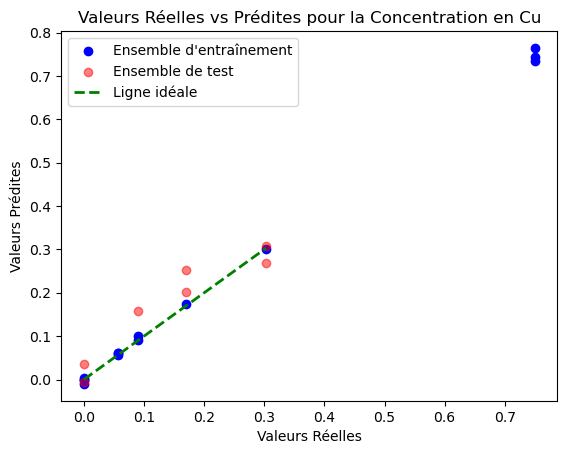

In [ ]:
from sklearn.linear_model import Lasso

def prédire_et_visualiser(data, data_spectre, element):
    # Fusionner les données
    données_fusionnées = fusionner_les_données_avec_élément(data_concentrations, data_spectre, element)

    # Préparer les données
    X = données_fusionnées.drop(columns=['Alloy',element])
    y = données_fusionnées[element]

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Entraîner le modèle Lasso
    modèle_lasso = Lasso(alpha=0.1)
    modèle_lasso.fit(X_train, y_train)

    # Faire des prédictions pour les ensembles d'entraînement et de test
    y_pred_train = modèle_lasso.predict(X_train)
    y_pred_test = modèle_lasso.predict(X_test)

    # Évaluer les performances du modèle sur l'ensemble de test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Évaluer les performances du modèle sur l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f'Erreur quadratique moyenne (ensemble de test) : {mse_test}')
    print(f'Score R^2 (ensemble de test) : {r2_test}')

    print(f'Erreur quadratique moyenne (ensemble d\'entraînement) : {mse_train}')
    print(f'Score R^2 (ensemble d\'entraînement) : {r2_train}')

    # Tracé des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_train, y_pred_train, label='Ensemble d\'entraînement', color='blue')
    plt.scatter(y_test, y_pred_test, label='Ensemble de test', color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2, label='Ligne idéale')

    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title(f'Valeurs Réelles vs Prédites pour la Concentration en {element}')
    plt.legend()
    plt.show()

# Exemple d'utilisation :
prédire_et_visualiser(data_concentrations, data_spectre, 'Cu')


Alpha optimal: 1.0263015333332388
Erreur quadratique moyenne (ensemble de test) : 0.0006699354116242513
Score R^2 (ensemble de test) : 0.951171973465116
Erreur quadratique moyenne (ensemble d'entraînement) : 0.0006467776994375176
Score R^2 (ensemble d'entraînement) : 0.9921856723163371


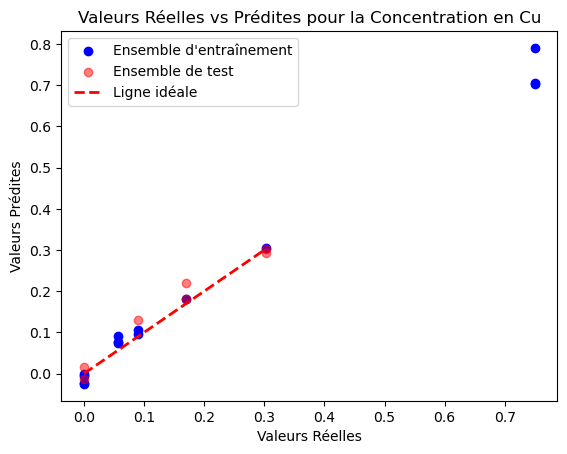

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

def recherche_alpha_optimal(X, y):
    # Créer un modèle de régression LassoCV
    lasso_cv_model = LassoCV(cv=5, random_state=0)

    # Ajuster le modèle aux données d'entraînement
    lasso_cv_model.fit(X, y)

    # Afficher l'alpha optimal
    print("Alpha optimal:", lasso_cv_model.alpha_)

    return lasso_cv_model.alpha_

def prédire_et_visualiser(data, data_spectre, element):
    # Fusionner les données
    données_fusionnées = fusionner_les_données_avec_élément(data_concentrations, data_spectre, element)

    # Préparer les données
    X = données_fusionnées.drop(columns=['Alloy',element])
    y = données_fusionnées[element]

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Recherche de l'alpha optimal
    alpha_optimal = recherche_alpha_optimal(X_train, y_train)

    # Entraîner le modèle Lasso avec l'alpha optimal
    modèle_lasso = Lasso(alpha=alpha_optimal)
    modèle_lasso.fit(X_train, y_train)

    # Faire des prédictions pour les ensembles d'entraînement et de test
    y_pred_train = modèle_lasso.predict(X_train)
    y_pred_test = modèle_lasso.predict(X_test)

    # Évaluer les performances du modèle sur l'ensemble de test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Évaluer les performances du modèle sur l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f'Erreur quadratique moyenne (ensemble de test) : {mse_test}')
    print(f'Score R^2 (ensemble de test) : {r2_test}')

    print(f'Erreur quadratique moyenne (ensemble d\'entraînement) : {mse_train}')
    print(f'Score R^2 (ensemble d\'entraînement) : {r2_train}')

    # Tracé des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_train, y_pred_train, label='Ensemble d\'entraînement', color='blue')
    plt.scatter(y_test, y_pred_test, label='Ensemble de test', color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ligne idéale')

    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title(f'Valeurs Réelles vs Prédites pour la Concentration en {element}')
    plt.legend()
    plt.show()

# Exemple d'utilisation :
prédire_et_visualiser(data_concentrations, data_spectre, 'Cu')


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

def recherche_alpha_optimal(X, y):
    # Créer un modèle de régression LassoCV
    lasso_cv_model = LassoCV(cv=5, random_state=0)

    # Ajuster le modèle aux données d'entraînement
    lasso_cv_model.fit(X, y)

    # Afficher l'alpha optimal
    print("Alpha optimal:", lasso_cv_model.alpha_)

    return lasso_cv_model.alpha_

def prédire_et_visualiser(data, data_spectre, element):
    # Fusionner les données
    données_fusionnées = fusionner_les_données_avec_élément(data_concentrations, data_spectre, element)

    # Préparer les données
    X = données_fusionnées.drop(columns=['Alloy',element])
    y = données_fusionnées[element]

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Recherche de l'alpha optimal
    alpha_optimal = recherche_alpha_optimal(X_train, y_train)

    # Entraîner le modèle Lasso avec l'alpha optimal
    modèle_lasso = Lasso(alpha=alpha_optimal)
    modèle_lasso.fit(X_train, y_train)

    # Faire des prédictions pour les ensembles d'entraînement et de test
    y_pred_train = modèle_lasso.predict(X_train)
    y_pred_test = modèle_lasso.predict(X_test)

    # Évaluer les performances du modèle sur l'ensemble de test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Évaluer les performances du modèle sur l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f'Erreur quadratique moyenne (ensemble de test) : {mse_test}')
    print(f'Score R^2 (ensemble de test) : {r2_test}')

    print(f'Erreur quadratique moyenne (ensemble d\'entraînement) : {mse_train}')
    print(f'Score R^2 (ensemble d\'entraînement) : {r2_train}')

    # Tracé des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_train, y_pred_train, label='Ensemble d\'entraînement', color='blue')
    plt.scatter(y_test, y_pred_test, label='Ensemble de test', color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ligne idéale')

    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title(f'Valeurs Réelles vs Prédites pour la Concentration en {element}')
    plt.legend()
    plt.show()

# Exemple d'utilisation :
prédire_et_visualiser(data_concentrations, data_spectre, 'Fe')


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

def recherche_alpha_optimal(X, y):
    # Créer un modèle de régression LassoCV
    lasso_cv_model = LassoCV(cv=5, random_state=0)

    # Ajuster le modèle aux données d'entraînement
    lasso_cv_model.fit(X, y)

    # Afficher l'alpha optimal
    print("Alpha optimal:", lasso_cv_model.alpha_)

    return lasso_cv_model.alpha_

def prédire_et_visualiser(data, data_spectre, element):
    # Fusionner les données
    données_fusionnées = fusionner_les_données_avec_élément(data_concentrations, data_spectre, element)

    # Préparer les données
    X = données_fusionnées.drop(columns=['Alloy',element])
    y = données_fusionnées[element]

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Recherche de l'alpha optimal
    alpha_optimal = recherche_alpha_optimal(X_train, y_train)

    # Entraîner le modèle Lasso avec l'alpha optimal
    modèle_lasso = Lasso(alpha=alpha_optimal)
    modèle_lasso.fit(X_train, y_train)

    # Faire des prédictions pour les ensembles d'entraînement et de test
    y_pred_train = modèle_lasso.predict(X_train)
    y_pred_test = modèle_lasso.predict(X_test)

    # Évaluer les performances du modèle sur l'ensemble de test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Évaluer les performances du modèle sur l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f'Erreur quadratique moyenne (ensemble de test) : {mse_test}')
    print(f'Score R^2 (ensemble de test) : {r2_test}')

    print(f'Erreur quadratique moyenne (ensemble d\'entraînement) : {mse_train}')
    print(f'Score R^2 (ensemble d\'entraînement) : {r2_train}')

    # Tracé des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_train, y_pred_train, label='Ensemble d\'entraînement', color='blue')
    plt.scatter(y_test, y_pred_test, label='Ensemble de test', color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ligne idéale')

    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title(f'Valeurs Réelles vs Prédites pour la Concentration en {element}')
    plt.legend()
    plt.show()

# Exemple d'utilisation :
prédire_et_visualiser(data_concentrations, data_spectre, 'Mg')


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

def recherche_alpha_optimal(X, y):
    # Créer un modèle de régression LassoCV
    lasso_cv_model = LassoCV(cv=5, random_state=0)

    # Ajuster le modèle aux données d'entraînement
    lasso_cv_model.fit(X, y)

    # Afficher l'alpha optimal
    print("Alpha optimal:", lasso_cv_model.alpha_)

    return lasso_cv_model.alpha_

def prédire_et_visualiser(data, data_spectre, element):
    # Fusionner les données
    données_fusionnées = fusionner_les_données_avec_élément(data_concentrations, data_spectre, element)

    # Préparer les données
    X = données_fusionnées.drop(columns=['Alloy',element])
    y = données_fusionnées[element]

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Recherche de l'alpha optimal
    alpha_optimal = recherche_alpha_optimal(X_train, y_train)

    # Entraîner le modèle Lasso avec l'alpha optimal
    modèle_lasso = Lasso(alpha=alpha_optimal)
    modèle_lasso.fit(X_train, y_train)

    # Faire des prédictions pour les ensembles d'entraînement et de test
    y_pred_train = modèle_lasso.predict(X_train)
    y_pred_test = modèle_lasso.predict(X_test)

    # Évaluer les performances du modèle sur l'ensemble de test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Évaluer les performances du modèle sur l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f'Erreur quadratique moyenne (ensemble de test) : {mse_test}')
    print(f'Score R^2 (ensemble de test) : {r2_test}')

    print(f'Erreur quadratique moyenne (ensemble d\'entraînement) : {mse_train}')
    print(f'Score R^2 (ensemble d\'entraînement) : {r2_train}')

    # Tracé des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_train, y_pred_train, label='Ensemble d\'entraînement', color='blue')
    plt.scatter(y_test, y_pred_test, label='Ensemble de test', color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ligne idéale')

    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title(f'Valeurs Réelles vs Prédites pour la Concentration en {element}')
    plt.legend()
    plt.show()

# Exemple d'utilisation :
prédire_et_visualiser(data_concentrations, data_spectre, 'Mg')


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

def recherche_alpha_optimal(X, y):
    # Créer un modèle de régression LassoCV
    lasso_cv_model = LassoCV(cv=5, random_state=0)

    # Ajuster le modèle aux données d'entraînement
    lasso_cv_model.fit(X, y)

    # Afficher l'alpha optimal
    print("Alpha optimal:", lasso_cv_model.alpha_)

    return lasso_cv_model.alpha_

def prédire_et_visualiser(data, data_spectre, element):
    # Fusionner les données
    données_fusionnées = fusionner_les_données_avec_élément(data_concentrations, data_spectre, element)

    # Préparer les données
    X = données_fusionnées.drop(columns=['Alloy',element])
    y = données_fusionnées[element]

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Recherche de l'alpha optimal
    alpha_optimal = recherche_alpha_optimal(X_train, y_train)

    # Entraîner le modèle Lasso avec l'alpha optimal
    modèle_lasso = Lasso(alpha=alpha_optimal)
    modèle_lasso.fit(X_train, y_train)

    # Faire des prédictions pour les ensembles d'entraînement et de test
    y_pred_train = modèle_lasso.predict(X_train)
    y_pred_test = modèle_lasso.predict(X_test)

    # Évaluer les performances du modèle sur l'ensemble de test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Évaluer les performances du modèle sur l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f'Erreur quadratique moyenne (ensemble de test) : {mse_test}')
    print(f'Score R^2 (ensemble de test) : {r2_test}')

    print(f'Erreur quadratique moyenne (ensemble d\'entraînement) : {mse_train}')
    print(f'Score R^2 (ensemble d\'entraînement) : {r2_train}')

    # Tracé des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_train, y_pred_train, label='Ensemble d\'entraînement', color='blue')
    plt.scatter(y_test, y_pred_test, label='Ensemble de test', color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ligne idéale')

    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.title(f'Valeurs Réelles vs Prédites pour la Concentration en {element}')
    plt.legend()
    plt.show()

# Exemple d'utilisation :
prédire_et_visualiser(data_concentrations, data_spectre, 'Ni')
